# BERT and Its Variants: A Comprehensive Learning Notebook

## Introduction

Bidirectional Encoder Representations from Transformers (BERT) has revolutionized the field of Natural Language Processing (NLP) by providing deep bidirectional representations, allowing models to understand context more effectively. This notebook will guide you through:

- **Understanding BERT:**
  - BERT Architecture
  - Masked Language Modeling (MLM)
  - Next Sentence Prediction (NSP)
  - Bidirectional Contextualization

- **Exploring BERT Variants:**
  - RoBERTa
  - DistilBERT
  - ALBERT

- **Implementing BERT:**
  - Fine-tuning BERT for a downstream task (e.g., Sentiment Analysis)

By the end of this notebook, you'll have a solid understanding of BERT and its practical applications.

**Resources for Further Reading:**

- [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805) by Devlin et al.
- [The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning)](http://jalammar.github.io/illustrated-bert/)
- [Hugging Face Transformers Documentation](https://huggingface.co/transformers/)

**Prerequisites:**

- Basic understanding of Python and PyTorch
- Familiarity with neural network concepts
- Understanding of NLP tasks and tokenization

---

## 1. Understanding BERT

### 1.1 BERT Architecture

BERT is based on the Transformer architecture, specifically the encoder part of the Transformer. Unlike traditional models that read text input sequentially (left-to-right or right-to-left), BERT reads the entire sequence of words at once, enabling bidirectional understanding.

**Key Components:**

- **Transformer Encoder Layers:** Stack of encoder layers, each consisting of Multi-Head Self-Attention and Feedforward Neural Networks.
- **Input Representation:** Combines token embeddings, segment embeddings, and positional embeddings.
- **Pre-training Tasks:** Masked Language Modeling (MLM) and Next Sentence Prediction (NSP).

**Diagram:**

![BERT Architecture](https://humboldt-wi.github.io/blog/img/seminar/bert/bert_architecture.png)

*Figure: BERT Architecture*

### 1.2 Masked Language Modeling (MLM)

**Objective:** Predict masked tokens in a sentence.

**How It Works:**

1. Randomly mask some tokens in the input sequence.
2. The model attempts to predict the original value of the masked tokens based on their context.

**Example:**

Original Sentence:

```The quick brown fox jumps over the lazy dog.```

Masked Sentence:

```The quick [MASK] fox jumps over the lazy dog.```

**Implementation Details:**

- 15% of tokens are selected for masking.
- Of the selected tokens:
  - 80% are replaced with `[MASK]`.
  - 10% are replaced with a random token.
  - 10% remain unchanged.

### 1.3 Next Sentence Prediction (NSP)

**Objective:** Understand the relationship between two sentences.

**How It Works:**

- During pre-training, the model is given pairs of sentences.
- It predicts whether the second sentence is the actual next sentence in the original text or a random sentence.

**Example:**

Sentence A:

```The quick brown fox jumps over the lazy dog.```

Sentence A:

```A fast, dark-colored fox leaps above a sleepy canine.```

*Is Sentence B the next sentence after Sentence A?*  
**Label:** Yes

**Implementation Details:**

- 50% of the pairs are actual consecutive sentences.
- 50% are random sentence pairs.

### 1.4 Bidirectional Contextualization

Unlike unidirectional models that process text in one direction, BERT’s bidirectional approach allows it to consider both left and right context simultaneously. This leads to a deeper understanding of language nuances.

**Benefits:**

- **Contextual Understanding:** Better grasp of word meanings based on surrounding text.
- **Handling Polysemy:** Ability to disambiguate words with multiple meanings.
- **Enhanced Representations:** More informative embeddings for downstream tasks.

---

## 2. Exploring BERT Variants

BERT has inspired numerous variants aimed at improving efficiency, scalability, and performance.

### 2.1 RoBERTa (Robustly Optimized BERT Pretraining Approach)

**Key Enhancements:**

- **Training Data:** Uses more data and longer training times.
- **Dynamic Masking:** Masks tokens dynamically during training instead of statically.
- **No NSP Task:** Removes the Next Sentence Prediction task, focusing solely on MLM.
- **Larger Batch Sizes:** Utilizes larger mini-batches for more stable training.

**Benefits:**

- Improved performance on various benchmarks compared to the original BERT.

### 2.2 DistilBERT

**Key Enhancements:**

- **Model Compression:** Reduces the size of BERT by 40% while retaining 97% of its language understanding capabilities.
- **Knowledge Distillation:** Trains a smaller model (student) to mimic the behavior of a larger model (teacher).

**Benefits:**

- Faster inference times.
- Reduced computational resources required.

### 2.3 ALBERT (A Lite BERT)

**Key Enhancements:**

- **Parameter Sharing:** Shares parameters across layers to reduce model size.
- **Factorized Embedding Parameterization:** Separates the size of hidden layers from the size of embeddings.

**Benefits:**

- Significantly fewer parameters.
- Comparable or better performance with reduced memory footprint.

### 2.4 GPT Series (Generative Pre-trained Transformer)

**Note:** While GPT models are more focused on generative tasks and utilize the decoder part of the Transformer, they share foundational similarities with BERT in leveraging Transformer architectures.

**Key Features:**

- **Unidirectional Contextualization:** Processes text in a left-to-right manner.
- **Generative Capabilities:** Excels at generating coherent and contextually relevant text.

---

## 3. Implementing BERT with HuggingFace Transformers

HuggingFace's `transformers` library provides a user-friendly interface to leverage pre-trained BERT models for various NLP tasks.

### 3.1 Setup

First, ensure that the necessary libraries are installed.

In [1]:
!pip install torch datasets torchvision torchaudio transformers matplotlib scikit-learn

### 3.2 Loading a Pre-trained BERT Model
We'll use bert-base-uncased, a commonly used BERT variant.



In [2]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

In [3]:
# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.to(device)

Using device: cuda


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

### 3.3 Tokenizing Input Data

BERT requires input data to be tokenized into a specific format.

In [4]:
# Example sentences
sentences = [
    "I love machine learning!",
    "Transformers are amazing.",
    "Natural Language Processing is fascinating."
]

# Tokenize the input
encoded_inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
encoded_inputs = {key: value.to(device) for key, value in encoded_inputs.items()}

print(encoded_inputs.keys())
print(encoded_inputs['input_ids'])

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
tensor([[  101,  1045,  2293,  3698,  4083,   999,   102,     0],
        [  101, 19081,  2024,  6429,  1012,   102,     0,     0],
        [  101,  3019,  2653,  6364,  2003, 17160,  1012,   102]],
       device='cuda:0')


### 3.4 Making Predictions

We'll use a pre-trained sentiment analysis pipeline for demonstration.

In [5]:
# Using HuggingFace pipeline for sentiment analysis
sentiment_pipeline = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)

results = sentiment_pipeline(sentences)
for sentence, sentiment in zip(sentences, results):
    print(f"Sentence: {sentence}")
    print(f"Sentiment: {sentiment}\n")

Sentence: I love machine learning!
Sentiment: {'label': 'LABEL_0', 'score': 0.5236847996711731}

Sentence: Transformers are amazing.
Sentiment: {'label': 'LABEL_0', 'score': 0.5897676348686218}

Sentence: Natural Language Processing is fascinating.
Sentiment: {'label': 'LABEL_0', 'score': 0.5821096301078796}



*Note:* Since we used `BertForSequenceClassification` without fine-tuning on a specific task, the results may not be meaningful. For accurate results, fine-tuning on a labeled dataset is necessary.

---

## 4. Comprehensive Project: Fine-tuning BERT for Sentiment Analysis

### 4.1 Project Overview

We'll fine-tune a pre-trained BERT model to perform sentiment analysis on the IMDb movie reviews dataset. This involves:

1. **Loading and Preprocessing Data**
2. **Preparing the Dataset and DataLoader**
3. **Defining the Model**
4. **Training the Model**
5. **Evaluating the Model**
6. **Visualizing Results**

### 4.2 Loading and Preprocessing Data

We'll use the IMDb dataset available through `torchtext`.

In [6]:
import torch
from torch.utils.data import DataLoader
from transformers import BertTokenizer
from datasets import load_dataset
import pandas as pd

In [7]:
# Load the IMDB dataset
dataset = load_dataset('imdb')

# Convert to pandas DataFrame for easier handling
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

print("Training samples:", len(train_df))
print("Testing samples:", len(test_df))

# Check the unique labels to confirm their format
print("Unique training labels:", train_df['label'].unique())
print("Unique testing labels:", test_df['label'].unique())

# If labels are already 0 and 1, no mapping is needed
# If labels are strings, uncomment the following lines:
# label_mapping = {'neg': 0, 'pos': 1}
# train_df['label'] = train_df['label'].map(label_mapping)
# test_df['label'] = test_df['label'].map(label_mapping)


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Training samples: 25000
Testing samples: 25000
Unique training labels: [0 1]
Unique testing labels: [0 1]


### 4.3 Preprocessing

We'll encode the labels and tokenize the text data.

In [8]:
# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization function
def tokenize(texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=512)

# Apply tokenization
train_encodings = tokenize(train_df['text'].tolist())  # Convert to list
test_encodings = tokenize(test_df['text'].tolist())    # Convert to list

# Convert labels to tensors
train_labels = torch.tensor(train_df['label'].values)
test_labels = torch.tensor(test_df['label'].values)

print("Tokenization and label encoding completed successfully.")

Tokenization and label encoding completed successfully.


### 4.4 Creating a PyTorch Dataset

In [9]:
from torch.utils.data import Dataset

class IMDbDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# Create dataset objects
train_dataset = IMDbDataset(train_encodings, train_labels)
test_dataset = IMDbDataset(test_encodings, test_labels)

### 4.5 Preparing DataLoaders

In [10]:
from torch.utils.data import DataLoader

# Define DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print("Number of training batches:", len(train_loader))
print("Number of testing batches:", len(test_loader))

Number of training batches: 3125
Number of testing batches: 3125


### 4.6 Defining the Model

We'll use `BertForSequenceClassification`, which is suitable for classification tasks.

In [11]:
from transformers import BertForSequenceClassification

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

### 4.7 Setting Up the Optimizer and Scheduler

In [12]:
from transformers import AdamW, get_linear_schedule_with_warmup

# Define optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Total number of training steps
total_steps = len(train_loader) * 3  # 3 epochs

# Define scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


### 4.8 Training the Model

In [13]:
from tqdm import tqdm

# Function to calculate accuracy
def calculate_accuracy(preds, labels):
    pred_labels = torch.argmax(preds, dim=1)
    return (pred_labels == labels).sum().item() / len(labels)

epochs = 3

for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    model.train()
    total_loss = 0
    total_acc = 0
    for batch in tqdm(train_loader, desc="Training"):
        # Move batch to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        
        # Backward pass
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        # Accumulate loss and accuracy
        total_loss += loss.item()
        total_acc += calculate_accuracy(logits, labels)
    
    avg_loss = total_loss / len(train_loader)
    avg_acc = total_acc / len(train_loader)
    print(f"Training Loss: {avg_loss:.4f}, Training Accuracy: {avg_acc:.4f}")
    
    # Evaluation after each epoch
    model.eval()
    total_loss = 0
    total_acc = 0
    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            
            total_loss += loss.item()
            total_acc += calculate_accuracy(logits, labels)
    
    avg_loss = total_loss / len(test_loader)
    avg_acc = total_acc / len(test_loader)
    print(f"Validation Loss: {avg_loss:.4f}, Validation Accuracy: {avg_acc:.4f}")


Epoch 1/3


Training: 100%|██████████| 3125/3125 [22:55<00:00,  2.27it/s]


Training Loss: 0.2335, Training Accuracy: 0.9062


Evaluating: 100%|██████████| 3125/3125 [06:13<00:00,  8.37it/s]


Validation Loss: 0.1612, Validation Accuracy: 0.9386

Epoch 2/3


Training: 100%|██████████| 3125/3125 [22:56<00:00,  2.27it/s]


Training Loss: 0.1010, Training Accuracy: 0.9659


Evaluating: 100%|██████████| 3125/3125 [06:14<00:00,  8.35it/s]


Validation Loss: 0.1777, Validation Accuracy: 0.9396

Epoch 3/3


Training: 100%|██████████| 3125/3125 [22:57<00:00,  2.27it/s]


Training Loss: 0.0336, Training Accuracy: 0.9913


Evaluating: 100%|██████████| 3125/3125 [06:14<00:00,  8.34it/s]

Validation Loss: 0.2186, Validation Accuracy: 0.9423


*Note:* Training BERT on large datasets can be computationally intensive. For faster experimentation, consider using a subset of the dataset or leveraging cloud resources.

### 4.9 Evaluating the Model

After training, evaluate the model's performance on the test set.

Testing: 100%|██████████| 3125/3125 [06:14<00:00,  8.35it/s]



Test Accuracy: 0.9423

Classification Report:
              precision    recall  f1-score   support

    Negative       0.95      0.94      0.94     12500
    Positive       0.94      0.95      0.94     12500

    accuracy                           0.94     25000
   macro avg       0.94      0.94      0.94     25000
weighted avg       0.94      0.94      0.94     25000



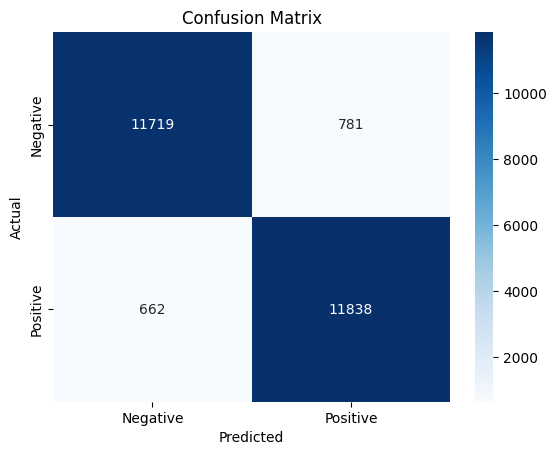

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=['Negative', 'Positive']))

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### 4.10 Visualizing Predictions

Let's visualize some sample predictions.

In [15]:
# Select random samples from the test set
import random

sample_indices = random.sample(range(len(test_df)), 5)
for idx in sample_indices:
    sentence = test_df.iloc[idx]['text']
    label = test_df.iloc[idx]['label']
    
    # Tokenize and encode
    encoding = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True).to(device)
    
    # Predict
    with torch.no_grad():
        outputs = model(**encoding)
        logits = outputs.logits
        pred = torch.argmax(logits, dim=1).item()
    
    sentiment = 'Positive' if pred == 1 else 'Negative'
    actual = 'Positive' if label == 1 else 'Negative'
    print(f"Sentence: {sentence}")
    print(f"Actual Sentiment: {actual}, Predicted Sentiment: {sentiment}\n")

Sentence: This is a case of taking a fairy tale too far. The Enchanted Cottage delivers Dorothy McGuire as a "terrible ugly" spinster and Robert Young as a disfigured pilot. Long story short: Scarface marries Spinster, after which their love transforms them, miraculously (lighting, cosmetics and the removal of fake scars), into beautiful peoplea magical change that they attribute to the enchantment of living in a seaside cottage that has been the abode of generations of honeymooners.<br /><br />If the story stopped there, fine; it would be a fable with a proverbial message: beauty is in the eye of the beholder. But it lurches ahead, reaching for reality. When Mr. and Mrs. Scarface greet their public, it comes as a painful shock to them that they're still homely. You see, they only appear beautiful to each other a situation which the audience is well prepared for because all the secondary characters have been sermonizing that ill-favored people really need to lower their expectations,

---

## 5. Analysis and Insights

### 5.1 Advantages of BERT Over Traditional RNNs

- **Bidirectional Contextualization:** BERT considers both left and right context simultaneously, enabling a deeper understanding of language nuances.
  
- **Pre-training with MLM and NSP:** BERT's pre-training tasks allow it to learn rich language representations that can be fine-tuned for various downstream tasks.
  
- **Transfer Learning:** Fine-tuning pre-trained BERT models on specific tasks often leads to state-of-the-art performance with relatively small task-specific datasets.
  
- **Handling Long-Range Dependencies:** The self-attention mechanism in BERT effectively captures dependencies between distant tokens in a sequence.

### 5.2 Challenges and Considerations

- **Computational Resources:** BERT models are large and require significant memory and computational power, especially during training.
  
- **Fine-tuning Sensitivity:** BERT can be sensitive to hyperparameters during fine-tuning, necessitating careful tuning for optimal performance.
  
- **Interpretability:** While attention mechanisms provide some interpretability, understanding the full decision-making process of BERT remains complex.

---

## 6. Further Steps and Resources

### 6.1 Experiment with Different Tasks

- **Named Entity Recognition (NER)**
- **Question Answering**
- **Text Summarization**

### 6.2 Explore BERT Variants

- **RoBERTa:** Explore its improved training methodology.
- **DistilBERT:** Implement a distilled version for efficiency.
- **ALBERT:** Experiment with parameter-efficient BERT variants.

### 6.3 Dive Deeper into Transformers

- **Transformer-XL:** Understand its approach to handling longer sequences.
- **GPT Series:** Explore generative capabilities using decoder-only models.

### 6.4 Utilize HuggingFace Resources

- **HuggingFace Models:** Explore a wide range of pre-trained models.
- **HuggingFace Tutorials:** Engage with comprehensive tutorials for various NLP tasks.

**Remember:** Mastering BERT and its variants is pivotal for advancing in modern NLP. Leveraging pre-trained models and understanding their architecture enables you to tackle complex language understanding tasks with efficiency and effectiveness.

---

## References

- [Attention Is All You Need (Original Transformer Paper)](https://arxiv.org/abs/1706.03762) by Vaswani et al.
- [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805) by Devlin et al.
- [The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/)
- [Hugging Face Transformers Documentation](https://huggingface.co/transformers/)
- [PyTorch Documentation](https://pytorch.org/docs/stable/index.html)